In [1]:
# !pip install vis
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from IPython.display import Image, display
from tensorflow.keras import datasets, layers, models, preprocessing
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [2]:
tf.keras.backend.set_floatx('float64')
model = tf.keras.models.load_model('../../data/Modelling/simple_model.h5')
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

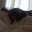

In [8]:
from PIL import Image
Image.open(open("../../data/Processed/cat3.png", 'rb'))

In [9]:
img = tf.keras.preprocessing.image.load_img("../../data/Processed/cat32new.png", target_size=(32, 32))
# convert to array
img = tf.keras.preprocessing.image.img_to_array(img)
# reshape into a single sample with 3 channels
img = img.reshape(1, 32, 32, 3)
# prepare pixel data
img = img.astype('float32')
img = img / 255.0

result = model.predict_classes(img)
print(result[0])
print(class_names[result[0]])


3
cat


In [10]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

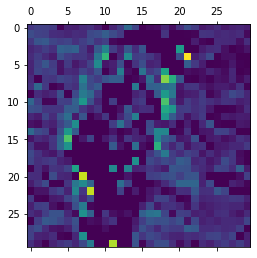

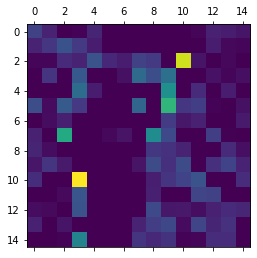

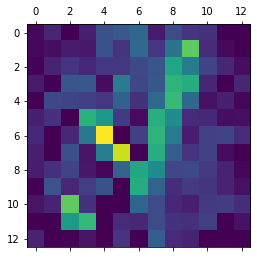

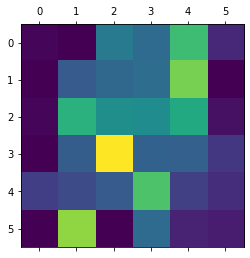

In [13]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


model.layers[-1].activation = None


last_conv_layer_name = "conv2d_12"

heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

last_conv_layer_name = "max_pooling2d_8"

heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

last_conv_layer_name = "conv2d_13"

heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()


last_conv_layer_name = "max_pooling2d_9"

heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

last_conv_layer_name = "conv2d_14"

heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name)




